Goal: Análisis de datos con Python

Ejercicio: Analizar el dataset, entre las siguientes consideraciones, se debe usar funciones y lambdas

Entre la informacion que quiero que consigas es:

- Resumen de la data, max,min ….
- Overwiew de la data
- Imports in kg per capita
- Re-exports in kg per capita
- Consumition in kg per capita
- Testear Normalización
- who drinks more coffee on average: Europeans or Americans?
- the relation between import and re-export

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  #with anaconda3

### Import Dataset 

In [3]:
df = pd.read_csv("dataset/Coffee_domestic_consumption.csv", sep=",")

df.head(5)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [4]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))


df.info()

Number of Rows: 55
Number of Columns: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02    

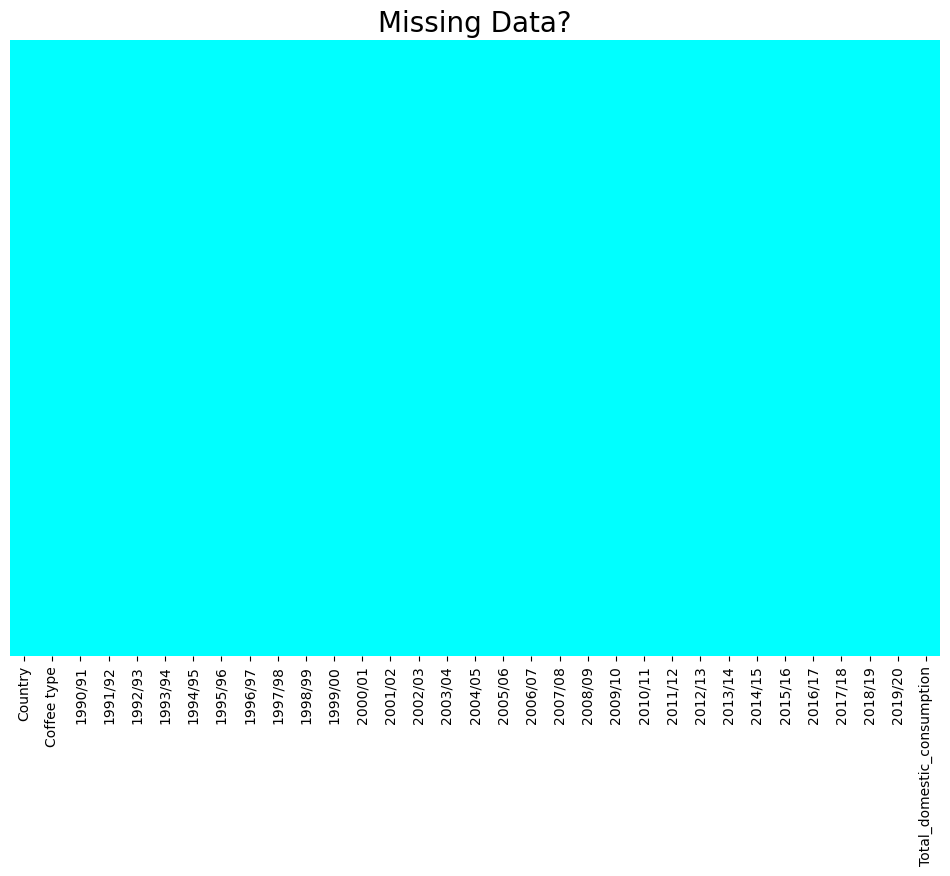

In [5]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.isnull(),cmap='cool',cbar=False,yticklabels=False)
plt.title('Missing Data?',fontsize=20)
plt.show()
#The data dont have NAs or spaces without data 

## Test de Normalización

In [6]:
df.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,2.128278e+07,2.206701e+07,2.285613e+07,2.301590e+07,2.330200e+07,2.465735e+07,2.565010e+07,2.647750e+07,2.739992e+07,2.808131e+07,...,4.711907e+07,4.871183e+07,4.944423e+07,5.069858e+07,5.165367e+07,5.272819e+07,5.420271e+07,5.481235e+07,5.452530e+07,1.112487e+09
std,6.810062e+07,7.032839e+07,7.363077e+07,7.511769e+07,7.679945e+07,8.321743e+07,9.039443e+07,9.438905e+07,9.995154e+07,1.040782e+08,...,1.634943e+08,1.687185e+08,1.676074e+08,1.701179e+08,1.719262e+08,1.777393e+08,1.840522e+08,1.858924e+08,1.844917e+08,3.834783e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+05,1.800000e+05,1.800000e+05,2.400000e+05,2.400000e+05,2.400000e+05,1.800000e+05,1.800000e+05,2.100000e+05,2.100000e+05,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,9.586920e+06
50%,2.040000e+06,3.000000e+06,3.000000e+06,2.400000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,4.020000e+06,4.302000e+06,4.408020e+06,4.519020e+06,4.560000e+06,4.620000e+06,4.680000e+06,4.200000e+06,4.290000e+06,1.216200e+08
75%,1.299000e+07,1.671300e+07,1.650000e+07,1.731000e+07,1.650000e+07,1.775535e+07,1.792548e+07,1.800000e+07,1.800000e+07,1.590000e+07,...,2.070000e+07,2.115000e+07,2.070000e+07,2.205000e+07,2.205000e+07,2.100000e+07,2.155002e+07,2.220000e+07,2.106000e+07,5.897930e+08
max,4.920000e+08,5.100000e+08,5.340000e+08,5.460000e+08,5.580000e+08,6.060000e+08,6.600000e+08,6.900000e+08,7.320000e+08,7.620000e+08,...,1.183200e+09,1.219800e+09,1.205100e+09,1.219980e+09,1.230480e+09,1.273500e+09,1.319820e+09,1.332000e+09,1.320000e+09,2.782470e+10


### Normalizacion
#### Normalizacion de la Media

     1990/91   1991/92   1992/93   1993/94   1994/95   1995/96   1996/97  \
0  -0.294899 -0.288177 -0.281895 -0.290423 -0.283882 -0.289090 -0.270482   
1  -0.290493 -0.290736 -0.288006 -0.283634 -0.280367 -0.274310 -0.262849   
2   6.912085  6.937923  6.941987  6.962196  6.962264  6.985828  7.017577   
3  -0.310757 -0.312406 -0.309030 -0.304872 -0.301851 -0.294858 -0.282430   
4  -0.004152 -0.015172 -0.025209 -0.026837 -0.029974 -0.043949 -0.084630   
5   0.781744  0.778249  0.764407  0.779099  0.790344  0.744107  0.702586   
6  -0.004152 -0.057829 -0.025209 -0.018849 -0.173205 -0.175893 -0.172910   
7  -0.310757 -0.312065 -0.308786 -0.304800 -0.301851 -0.294858 -0.282430   
8  -0.309876 -0.311212 -0.307971 -0.304800 -0.301851 -0.294858 -0.282430   
9  -0.299304 -0.300974 -0.298192 -0.290423 -0.287789 -0.281880 -0.270482   
10 -0.145120 -0.151674 -0.147440 -0.146649 -0.147163 -0.152100 -0.151006   
11 -0.311639 -0.312918 -0.309601 -0.305599 -0.302632 -0.295579 -0.283094   
12 -0.312520

<AxesSubplot:>

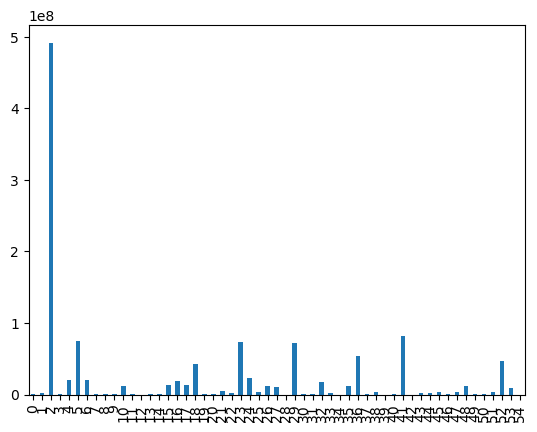

In [10]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df.drop(["Country","Coffee type"], axis=1))
print(df_mean_norm)


df['1990/91'].plot(kind='bar')

<AxesSubplot:>

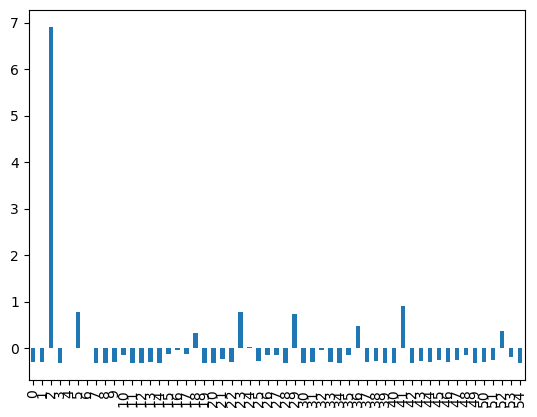

In [11]:
df_mean_norm['1990/91'].plot(kind='bar')

#### Normalizacion de MIN-MAX

     1990/91   1991/92   1992/93   1993/94   1994/95   1995/96   1996/97  \
0   0.002439  0.003529  0.003933  0.002198  0.002688  0.000990  0.001818   
1   0.003049  0.003176  0.003090  0.003132  0.003172  0.003020  0.002864   
2   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3   0.000244  0.000188  0.000191  0.000210  0.000215  0.000198  0.000182   
4   0.042683  0.041176  0.039326  0.038462  0.037634  0.034653  0.027273   
5   0.151463  0.150588  0.148202  0.149341  0.150538  0.142871  0.135091   
6   0.042683  0.035294  0.039326  0.039560  0.017921  0.016535  0.015182   
7   0.000244  0.000235  0.000225  0.000220  0.000215  0.000198  0.000182   
8   0.000366  0.000353  0.000337  0.000220  0.000215  0.000198  0.000182   
9   0.001829  0.001765  0.001685  0.002198  0.002151  0.001980  0.001818   
10  0.023171  0.022353  0.022472  0.021978  0.021505  0.019802  0.018182   
11  0.000122  0.000118  0.000112  0.000110  0.000108  0.000099  0.000091   
12  0.000000

<AxesSubplot:>

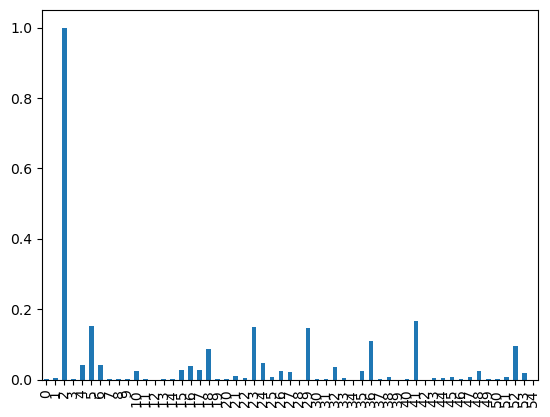

In [15]:
df_withoutC = df.drop(["Country","Coffee type"], axis=1)
df_withoutC.head(5)


def minmax_norm(df_input):
    return (df_withoutC- df_withoutC.min())/(df_withoutC.max() - df_withoutC.min())

df_minmax_norm = minmax_norm(df_withoutC)
print(df_minmax_norm)


df_minmax_norm['1990/91'].plot(kind='bar')

#### Normalizacion de Quantiles

         1990/91       1991/92       1992/93       1993/94       1994/95  \
0   4.100323e+06  5.421290e+06  5.421290e+06  3.413936e+06  4.550323e+06   
1   4.550323e+06  4.550323e+06  4.100323e+06  5.421290e+06  5.421290e+06   
2   1.795142e+09  1.795142e+09  1.795142e+09  1.795142e+09  1.795142e+09   
3   2.875800e+05  2.875800e+05  2.875800e+05  2.875800e+05  2.875800e+05   
4   4.444115e+07  8.084611e+07  4.444115e+07  4.444115e+07  8.084611e+07   
5   2.867110e+08  3.237658e+08  2.867110e+08  2.867110e+08  2.867110e+08   
6   4.444115e+07  3.807291e+07  4.444115e+07  8.084611e+07  2.335381e+07   
7   2.875800e+05  4.263213e+05  4.263213e+05  4.263213e+05  2.875800e+05   
8   4.634594e+05  5.267826e+05  5.267826e+05  4.263213e+05  2.875800e+05   
9   2.823097e+06  2.823097e+06  2.098001e+06  3.413936e+06  3.413936e+06   
10  2.828058e+07  2.441637e+07  2.441637e+07  2.441637e+07  2.576639e+07   
11  1.220806e+05  1.220806e+05  1.382574e+05  1.382574e+05  1.220806e+05   
12  0.000000

<AxesSubplot:>

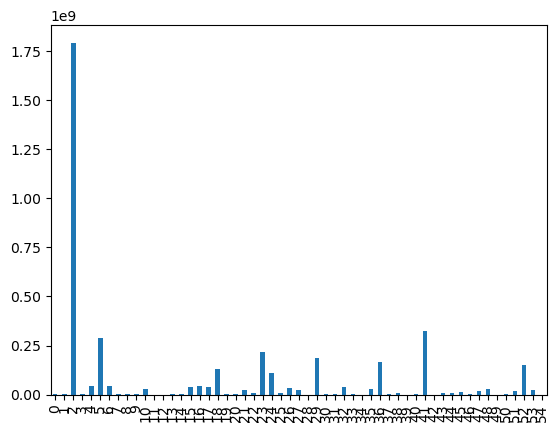

In [17]:
def quantile_norm(df_input):
    sorted_df = pd.DataFrame(np.sort(df_input.values,axis=0), index=df_input.index, columns=df_input.columns)
    mean_df = sorted_df.mean(axis=1)
    mean_df.index = np.arange(1, len(mean_df) + 1)
    quantile_df =df_input.rank(method="min").stack().astype(int).map(mean_df).unstack()
    return(quantile_df)

df_quantile_norm = quantile_norm(df_withoutC)

print(df_quantile_norm)

df_quantile_norm['1990/91'].plot(kind='bar')

### Coffee Type

Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: Coffee type, dtype: int64


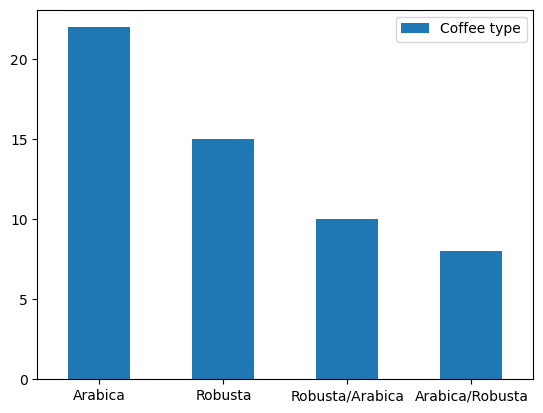

In [5]:
val_coffee_type = df["Coffee type"].value_counts()
print(val_coffee_type)
type(val_coffee_type)


coffee_type = val_coffee_type.to_frame()
type(coffee_type)

# PANDAS
ax = coffee_type.plot.bar(rot=0)

['Arabica', 'Robusta', 'Robusta/Arabica', 'Arabica/Robusta']
[22, 15, 10, 8]


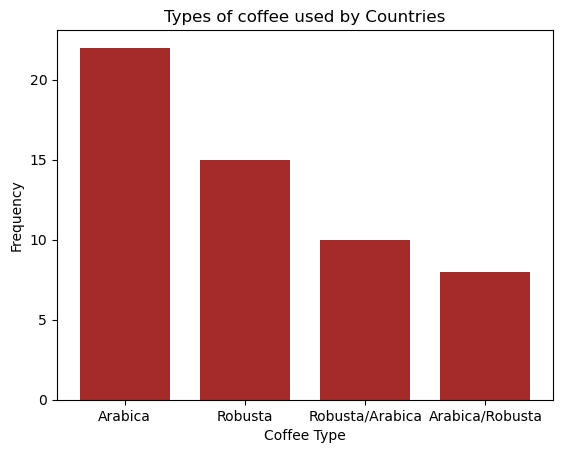

In [6]:
# MATPLOTLIB

types = list(val_coffee_type.keys())
print(types)
values = list(val_coffee_type)
print(values)


plt.bar(types,values,color ='brown', width = 0.75)

plt.xlabel("Coffee Type")
plt.ylabel("Frequency")
plt.title("Types of coffee used by Countries")
plt.show()

### 10 countries with the maximum Total Dosmetic Consumption 

[27824700000, 4920480000, 4536540000, 3189660000, 2807280000, 2536776384, 2386067999, 2093460000, 1920928320, 1248600000, 665335200, 642823380, 600600000, 590880000, 588705960, 471850680, 417242040, 410260140, 402000000, 384006000, 381540000, 359880000, 299700300, 284816400, 157980000, 143450940, 122916960, 121620000, 95190000, 86730000, 76425060, 75180000, 70740000, 58300020, 46500000, 35100000, 24794400, 21090000, 18688020, 10080000, 9970800, 9203040, 8640000, 8595960, 5360040, 3608400, 3412020, 2340000, 2167620, 2139960, 1123140, 991920, 294000, 0, 0]


/tmp/ipykernel_11641/1512029238.py:36: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.75, alpha = 0.2)


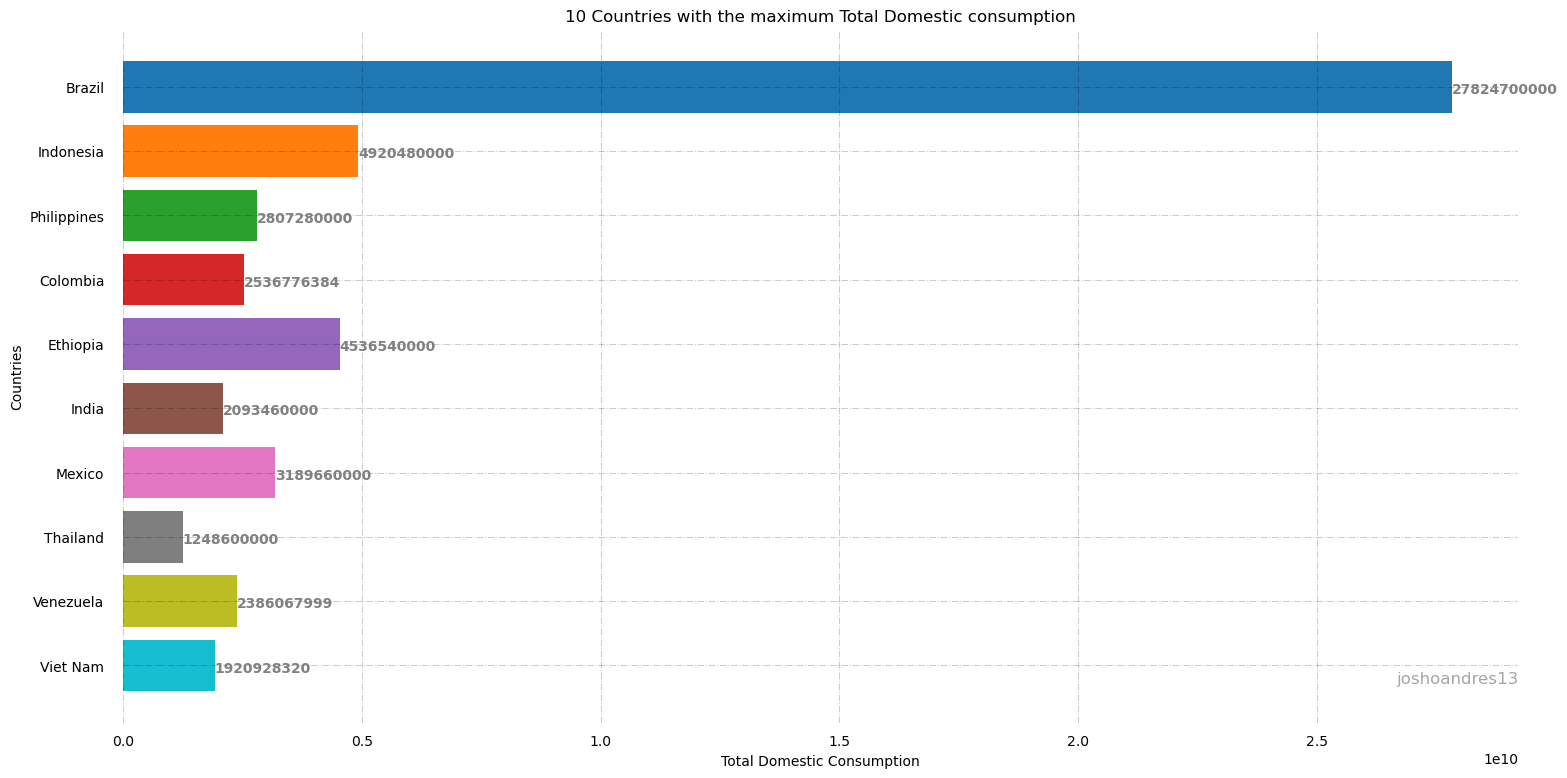

In [12]:
sort_consump =sorted(df['Total_domestic_consumption'], reverse=True)
print(sort_consump)


max_country_coffee = df[(df['Total_domestic_consumption']>=1248600000)]
max_country_coffee


max10_values_coffee = max_country_coffee['Total_domestic_consumption']
max10_values_coffee

max10_country_coffee = max_country_coffee['Country']
max10_country_coffee


# PLOT
# Fig Size
fig, ax = plt.subplots(figsize =(18, 9))

# Horizontal  Bar Plot
plt.barh(max10_country_coffee,max10_values_coffee,color =('C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'))

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.75, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

# Add Plot Title
plt.ylabel("Countries")
plt.xlabel("Total Domestic Consumption")
plt.title("10 Countries with the maximum Total Domestic consumption")

# Add Text watermark
fig.text(0.9, 0.15, 'joshoandres13', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()


### 12 countries with the minimal Total Dosmetic Consumption 

/tmp/ipykernel_10108/2707587033.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.75, alpha = 0.2)


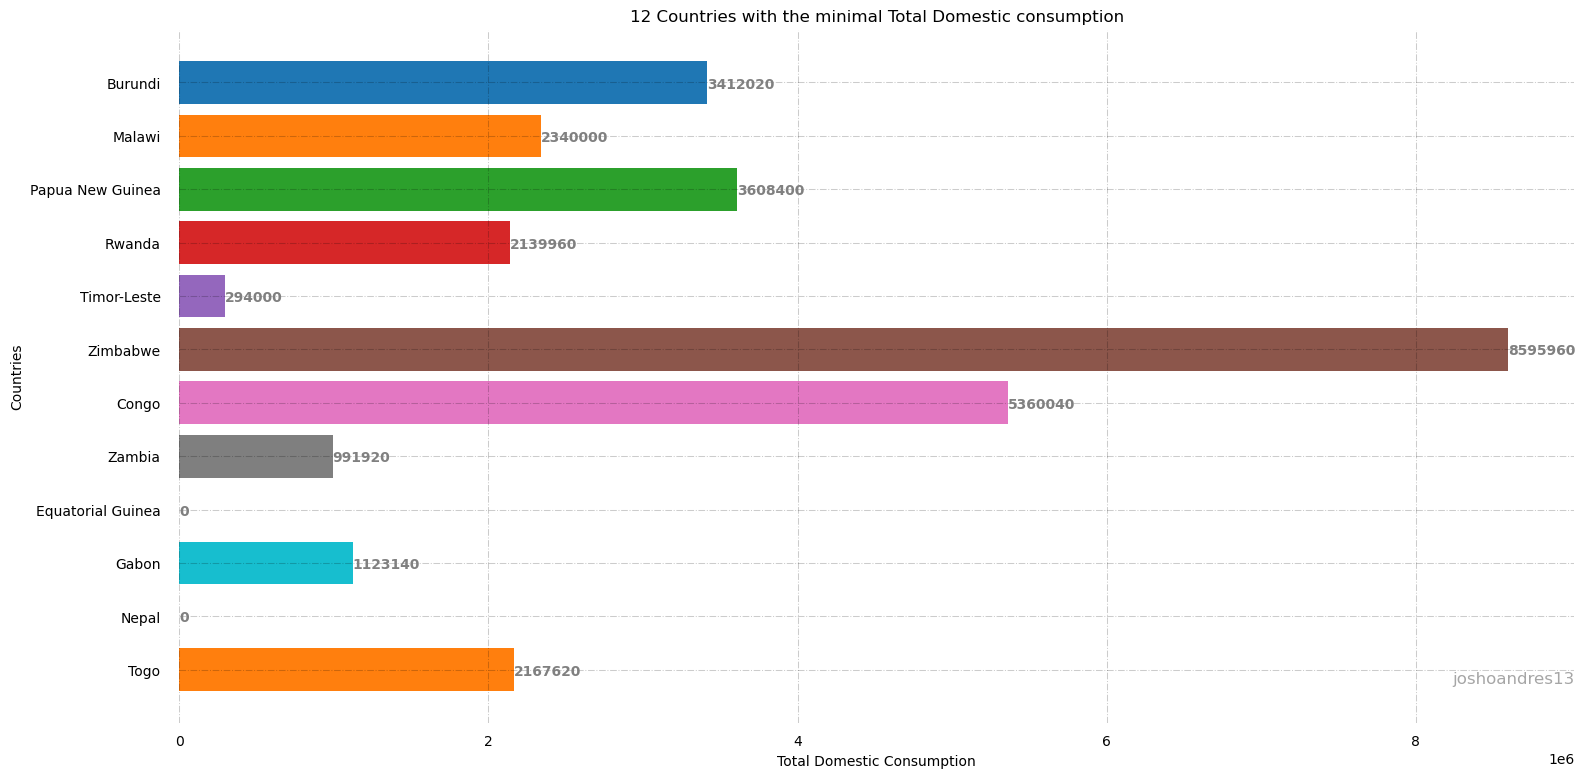

In [10]:
min_country_coffee = df[(df['Total_domestic_consumption']<=8595960)]
min_country_coffee


min10_values_coffee = min_country_coffee['Total_domestic_consumption']
min10_values_coffee

min10_country_coffee = min_country_coffee['Country']
min10_country_coffee

# PLOT
# Fig Size
fig, ax = plt.subplots(figsize =(18, 9))

# Horizontal  Bar Plot
plt.barh(min10_country_coffee,min10_values_coffee,color =('C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'))

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.75, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

# Add Plot Title
plt.ylabel("Countries")
plt.xlabel("Total Domestic Consumption")
plt.title("12 Countries with the minimal Total Domestic consumption")

# Add Text watermark
fig.text(0.9, 0.15, 'joshoandres13', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [6]:
def transpose_dataframe(df,sort_value_by_criteria, additional_columns=None):
    df_top10 = df.sort_values(by=[sort_value_by_criteria], ascending=False).head(10)
    transpose_df_top10 = df_top10.T
    transpose_df_top10.drop(["Country",sort_value_by_criteria],inplace=True, axis=0) #implace edita el archivo actual no genera copia
    if not additional_columns is None:
         transpose_df_top10.drop([additional_columns],inplace=True, axis=0)
    transpose_df_top10.columns = df_top10['Country'].values
    transpose_df_top10.head(2)
    return transpose_df_top10

In [7]:
df_year_domestic_consumption = transpose_dataframe(df, 'Total_domestic_consumption', 'Coffee type')
df_year_domestic_consumption

,Brazil,Indonesia,Ethiopia,Mexico,Philippines,Colombia,Venezuela,India,Viet Nam,Thailand
1990/91,492000000,74520000,72000000,82440000,43200000,74100000,46943400,54180000,9000000,11280000
1991/92,510000000,76800000,75840000,72000000,45000000,76140000,48928800,55000020,13800000,13200000
1992/93,534000000,79140000,79860000,78000000,45000000,78180000,50998200,55020000,15000000,13980000
1993/94,546000000,81540000,84120000,64200000,46200000,80340000,53155800,49999980,16020000,15000000
1994/95,558000000,84000000,88560000,61200000,47400000,82500000,55404000,50100000,16020000,16980000
1995/96,606000000,86580000,93300000,70740000,48600000,81540000,57747600,50220000,16910700,25020000
1996/97,660000000,89160000,98220000,74100000,49860000,80580000,60190800,50280000,17850960,19980000
1997/98,690000000,91920000,103440000,72060000,51180000,79680000,62736599,50340000,18843480,23400000
1998/99,732000000,94680000,108960000,66480000,48600000,78720000,65390400,54000000,19891140,25980000
1999/00,762000000,97560000,114720000,69000000,51720000,77820000,68156400,55500000,21000000,25980000


In [13]:
# function to plot the data
def production_date_coffee(df, title):
    Años = df.index
    Consumo_Domestico = df.columns.values
    fig = px.line(df, x=Años, y= Consumo_Domestico, title=title, markers=True)
    fig.update_layout(width=1000, height=1000)
    

    fig.update_traces(patch={"line":{"dash":"solid","shape":"spline","width":3}})
    fig.show()


production_date_coffee(df_year_domestic_consumption, 'Consumption over time of the top consuming countries')